In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
car_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Car Price Prediction/car data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking the Number of rows and column
car_dataset.shape

(301, 9)

In [5]:
# Getting information about Data Set
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Checking if there are any missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [7]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [8]:
# Encoding the categoriacal data is out machine learning model can understand numeric data better than text

# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-8-6da20a5ddb0d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
<ipython-input-8-6da20a5ddb0d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
<ipython-input-8-6da20a5ddb0d>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`.

In [9]:
# Checking encoded data
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


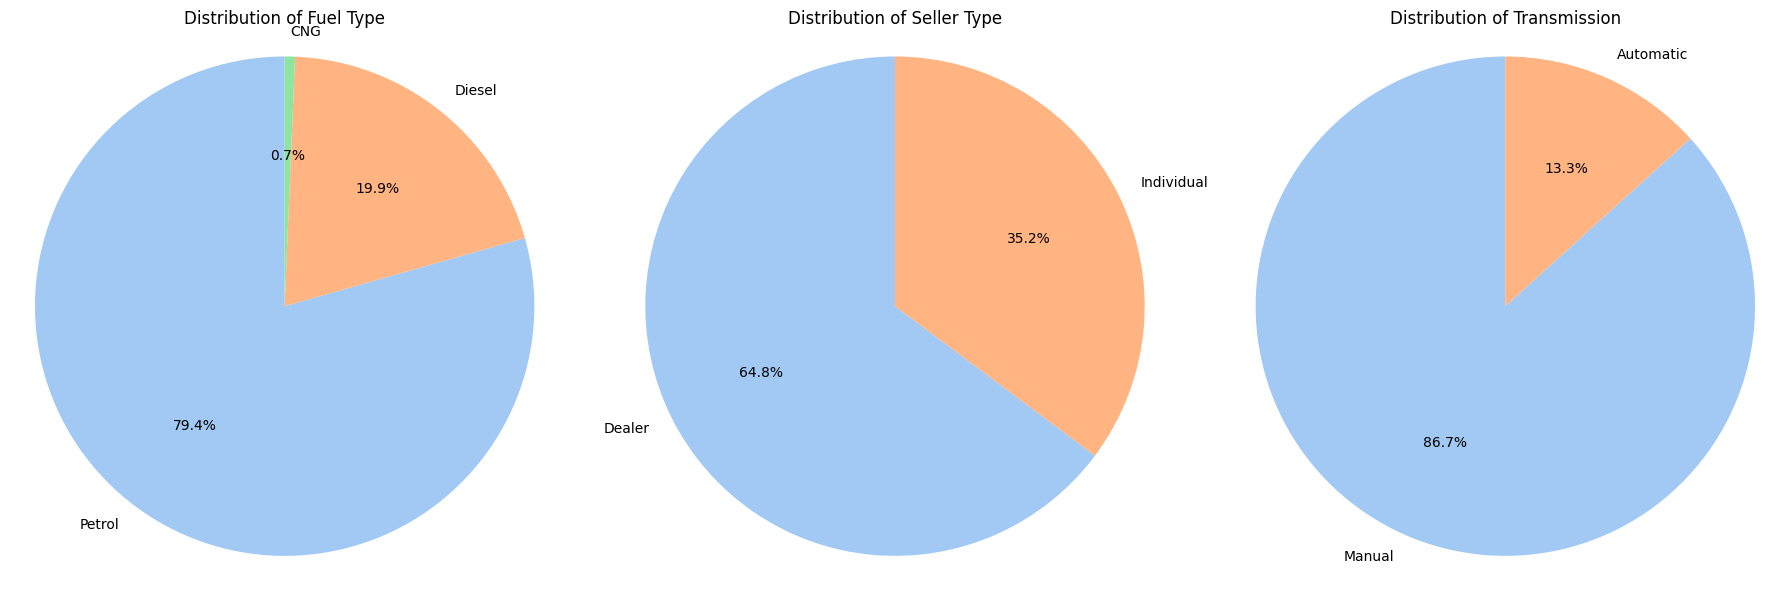

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for Fuel_Type
fuel_counts = car_dataset['Fuel_Type'].value_counts()
axes[0].pie(fuel_counts, labels=['Petrol', 'Diesel', 'CNG'],
             autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Distribution of Fuel Type')

# Pie chart for Seller_Type
seller_counts = car_dataset['Seller_Type'].value_counts()
axes[1].pie(seller_counts, labels=['Dealer', 'Individual'],
             autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].axis('equal')
axes[1].set_title('Distribution of Seller Type')

# Pie chart for Transmission
transmission_counts = car_dataset['Transmission'].value_counts()
axes[2].pie(transmission_counts, labels=['Manual', 'Automatic'],
             autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[2].axis('equal')
axes[2].set_title('Distribution of Transmission')

# Show the pie charts
plt.tight_layout()
plt.show()

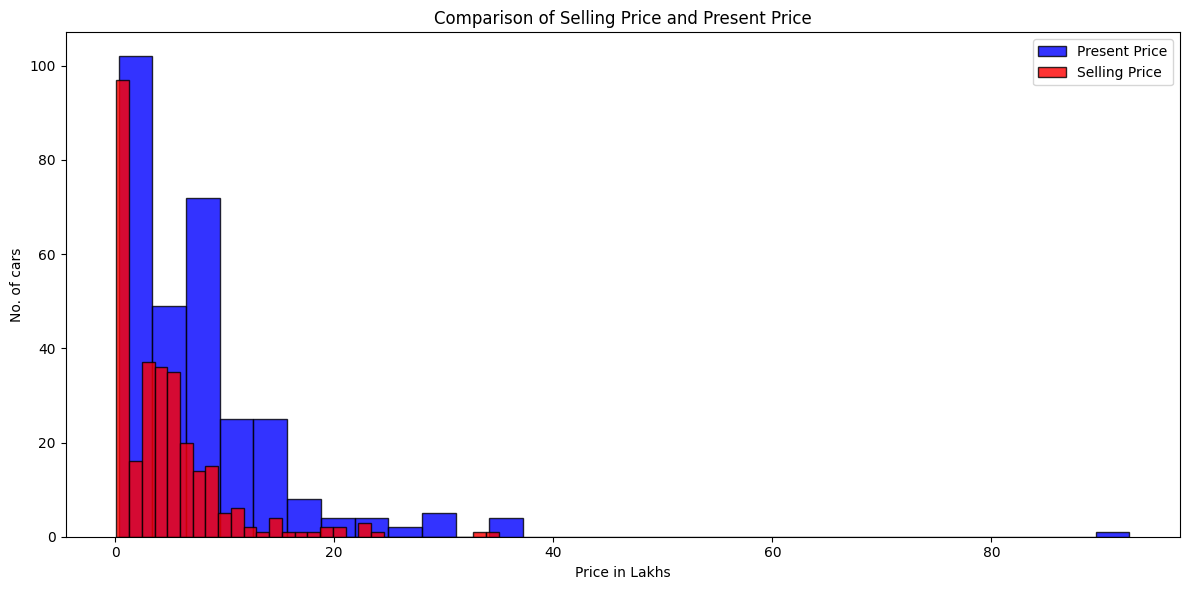

In [37]:
# Set up the histogram
plt.figure(figsize=(12, 6))

# Histogram for Present Price
plt.hist(car_dataset['Present_Price'], bins=30, alpha=0.8, label='Present Price', color='blue', edgecolor='black')

# Histogram for Selling Price
plt.hist(car_dataset['Selling_Price'], bins=30, alpha=0.8, label='Selling Price', color='red', edgecolor='black')

# Adding titles and labels
plt.title('Comparison of Selling Price and Present Price')
plt.xlabel('Price in Lakhs')
plt.ylabel('No. of cars')
plt.legend(loc='upper right')

# Show the histogram
plt.tight_layout()
plt.show()

In [36]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [13]:
# Splitting data into training test and validation
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [14]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [15]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [16]:
# Since data is small we are only going to split it into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [17]:
# Training the model (Linear Regression)
linear_regression_model = LinearRegression()

In [18]:
linear_regression_model.fit(X_train,Y_train)

LinearRegression()

In [19]:
# Model Evaluation
# Prediction on Training data
training_data_prediction = linear_regression_model.predict(X_train)

In [20]:
error_score = r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493711


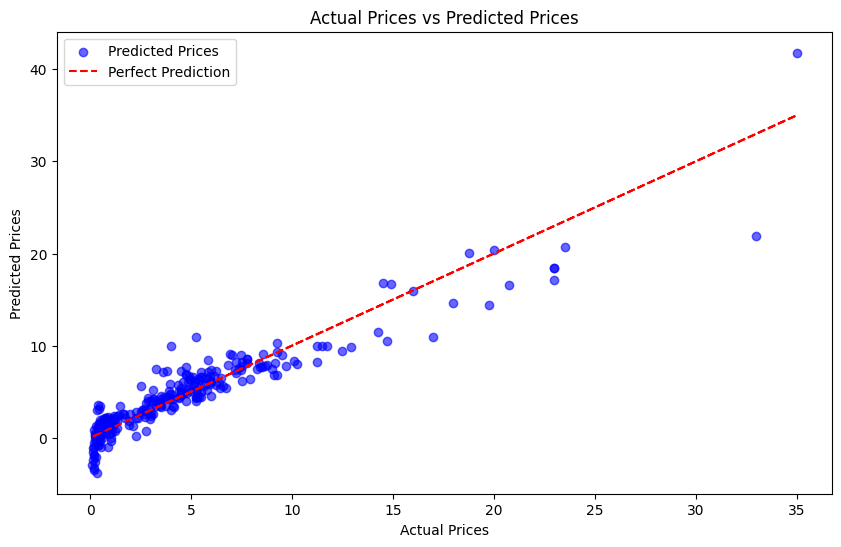

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, training_data_prediction, color='blue',alpha=0.6, label='Predicted Prices')
plt.plot(Y_train, Y_train, color='red', linestyle='--', label='Perfect Prediction')  # Line of equality
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()
plt.show()

In [22]:
# Model Evaluation
# Prediction on Testing data
testing_data_prediction = linear_regression_model.predict(X_test)

In [23]:
print(testing_data_prediction)

[10.32892855  0.77165673  4.26482324  4.78985002  9.88701568  4.24823193
  6.92536953  7.29321065  0.21950514  5.18527582  6.23823964  6.07761019
  2.1716932   7.77611973  1.89987958  1.79635895  2.10001123  1.91953211
  9.24977006  4.25291486  1.569912    9.04949049  1.52561157  9.65418587
  0.89631315  7.99187626  1.59929505 -3.17680912  4.24653988  2.1257015
  3.49654935]


In [24]:
error_score = r2_score(Y_test, testing_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715027051


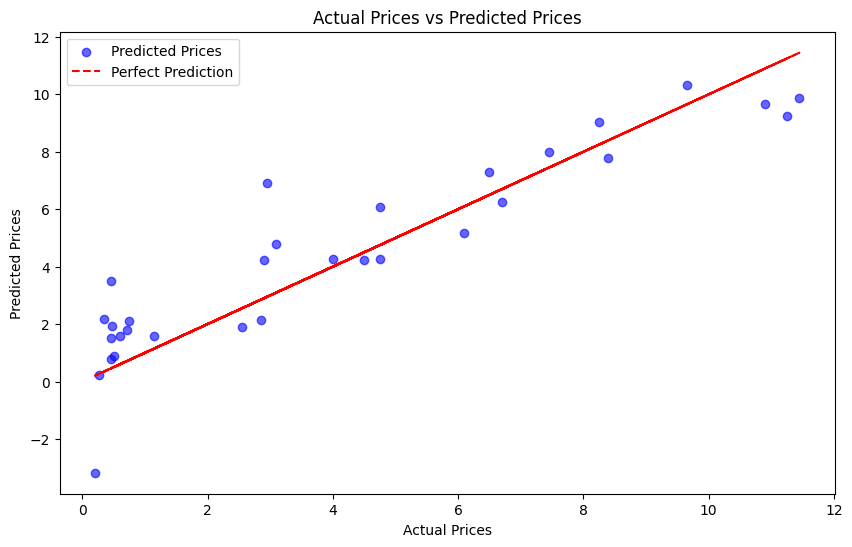

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, testing_data_prediction, color='blue',alpha=0.6, label='Predicted Prices')
plt.plot(Y_test, Y_test, color='red', linestyle='--', label='Perfect Prediction')  # Line of equality
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()
plt.show()

In [26]:
# Training model on lasso regression
lasso_model = Lasso()

In [27]:
lasso_model.fit(X_train, Y_train)

Lasso()

In [28]:
# Model Evaluation
# Prediction on Training data
training_data_prediction = lasso_model.predict(X_train)

In [29]:
error_score = r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


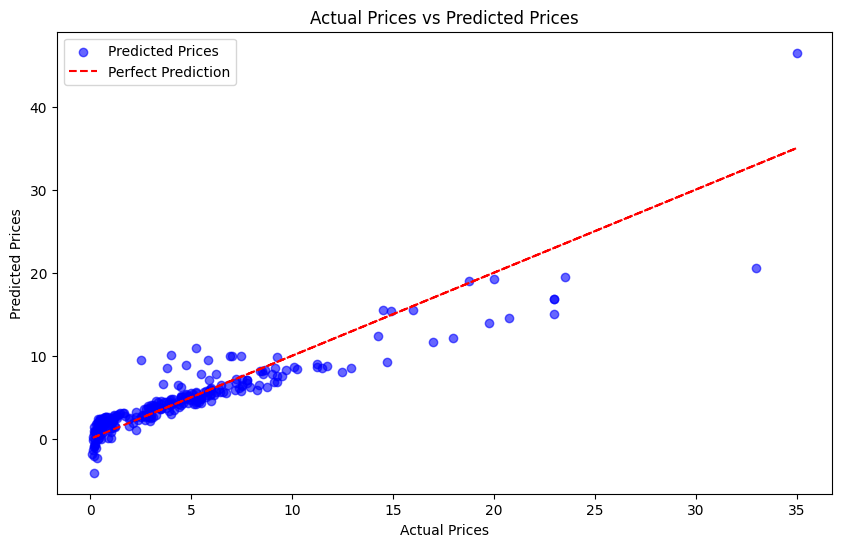

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, training_data_prediction, color='blue',alpha=0.6, label='Predicted Prices')
plt.plot(Y_train, Y_train, color='red', linestyle='--', label='Perfect Prediction')  # Line of equality
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()
plt.show()

In [31]:
# Model Evaluation
# Prediction on Testing data
testing_data_prediction = lasso_model.predict(X_test)

In [32]:
print(testing_data_prediction)

[ 9.87888122  1.42396266  4.33267834  3.17313445  8.95590579  4.29397384
  3.73913632  5.66283974  0.91478394  5.25514316  6.47238818  4.39507335
  1.2955156   8.26559961  2.00292338  2.32529219  2.55349653  2.34742172
  7.96895166  4.18441245  2.3369918   7.86598537  2.02308236  8.56734786
  1.55498136  6.48561097  2.11427451 -1.18422036  4.01710445  2.21749695
  2.41820898]


In [33]:
error_score = r2_score(Y_test, testing_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


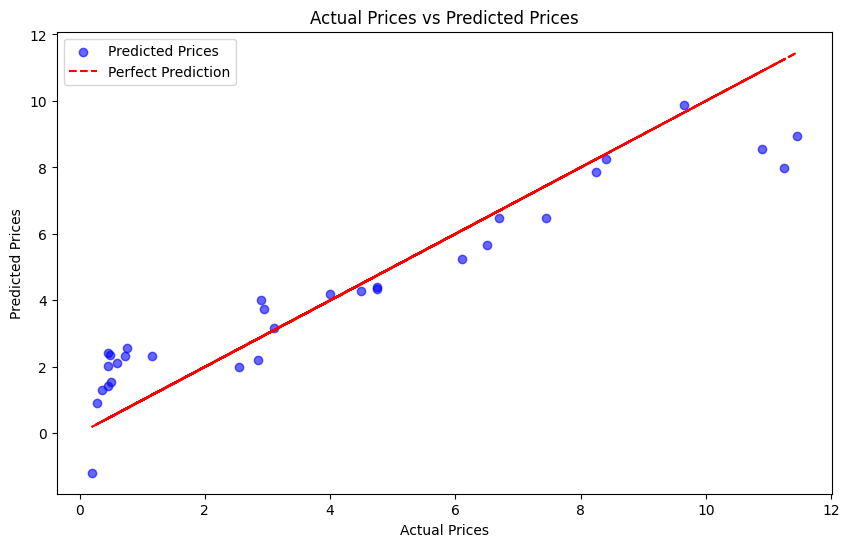

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, testing_data_prediction, color='blue',alpha=0.6, label='Predicted Prices')
plt.plot(Y_test, Y_test, color='red', linestyle='--', label='Perfect Prediction')  # Line of equality
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()
plt.show()